# ANALYSIS: CHRISTIAN HARDINAN

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [2]:
Chicago_crimes = pd.read_csv('Dataset_chicago\\Chicago_Crimes.csv')

In [3]:
Chicago_crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [4]:
Chicago_crimes.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [5]:
Chicago_crimes['Date'] = Chicago_crimes['Date'].astype(str)
Chicago_crimes['Date'] = Chicago_crimes['Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
Chicago_crimes['Date'] = Chicago_crimes['Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
Chicago_crimes['Date'] = pd.to_datetime(Chicago_crimes['Date'], dayfirst=True, errors='coerce')

In [6]:
Chicago_crimes['Location Description'] = Chicago_crimes['Location Description'].fillna(Chicago_crimes['Location Description'].mode()[0])
Chicago_crimes['X Coordinate'] = Chicago_crimes['X Coordinate'].fillna(Chicago_crimes['X Coordinate'].mean())
Chicago_crimes['Y Coordinate'] = Chicago_crimes['Y Coordinate'].fillna(Chicago_crimes['Y Coordinate'].mean())
Chicago_crimes['Latitude'] = Chicago_crimes['Latitude'].fillna(Chicago_crimes['Latitude'].mean())
Chicago_crimes['Longitude'] = Chicago_crimes['Longitude'].fillna(Chicago_crimes['Longitude'].mean())
Chicago_crimes['Location'] = Chicago_crimes['Location'].fillna(Chicago_crimes['Location'].mode()[0])
Chicago_crimes['Community Area'] = Chicago_crimes['Community Area'].fillna(Chicago_crimes['Community Area'].mode()[0])

In [8]:
Chicago_crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
Hour                    0
Weekday                 0
dtype: int64

In [9]:
Chicago_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    249123 non-null  int64         
 1   Case Number           249123 non-null  object        
 2   Date                  249123 non-null  datetime64[ns]
 3   Block                 249123 non-null  object        
 4   IUCR                  249123 non-null  object        
 5   Primary Type          249123 non-null  object        
 6   Description           249123 non-null  object        
 7   Location Description  249123 non-null  object        
 8   Arrest                249123 non-null  bool          
 9   Domestic              249123 non-null  bool          
 10  Beat                  249123 non-null  int64         
 11  District              249123 non-null  int64         
 12  Ward                  249123 non-null  int64         
 13 

<Axes: xlabel='Month'>

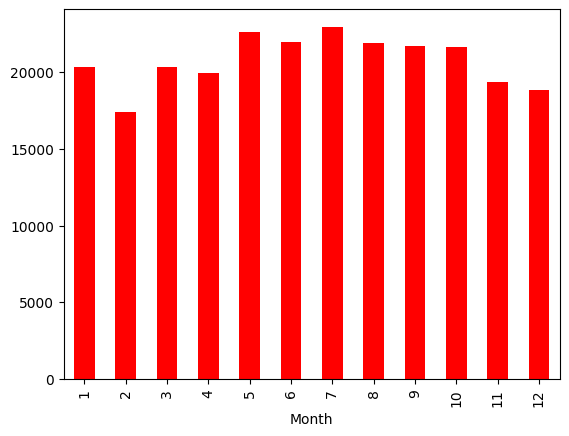

In [21]:
Chicago_crimes.groupby('Month')['Arrest'].count().plot(kind='bar',
color='red'
)

# Insight 1: On what month does the highest number of people who arrested?

## The bar graph shows that the month of July has recorded the highest number of arrested people, which was more than to 20,000.

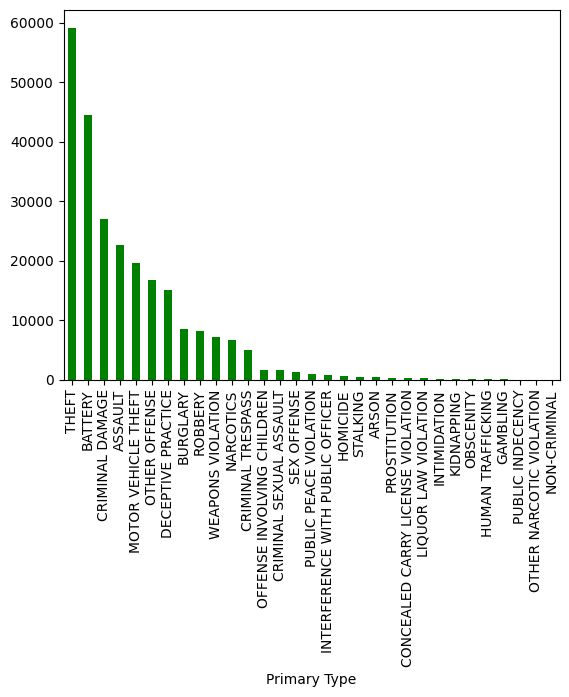

In [22]:
Chicago_crimes['Primary Type'].value_counts().plot(kind='bar',
color='green'
)
plt.show()

# Insight 2: What kind of crime has been recorded in the highest number?
## As we can see in the bar graph, theft crimes have been recorded in the highest number.

In [12]:
df_homicide = Chicago_crimes[Chicago_crimes['Primary Type'] == 'HOMICIDE']

In [13]:
df_homicide

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour,Weekday
53,28073,JH224200,2024-04-14 00:27:00,035XX W HARRISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,1897131.0,2024,04/22/2024 03:41:49 PM,41.873583,-87.714506,"(41.873582511, -87.714506124)",4,14,0,Sunday
493,28076,JH224904,2024-04-14 16:08:00,009XX N LAVERGNE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,1905993.0,2024,04/22/2024 03:41:49 PM,41.898092,-87.750777,"(41.898091745, -87.750776759)",4,14,16,Sunday
857,28074,JH225503,2024-04-15 02:22:00,016XX W 82ND ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,1850337.0,2024,04/23/2024 03:41:34 PM,41.744884,-87.664123,"(41.744884198, -87.664123445)",4,15,2,Monday
1455,28075,JH226744,2024-04-15 22:38:00,002XX E 111TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,1831409.0,2024,04/23/2024 03:41:34 PM,41.692660,-87.617638,"(41.692659589, -87.617637943)",4,15,22,Monday
2592,28077,JH228927,2024-04-17 15:29:00,046XX S WASHTENAW AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,1873725.0,2024,04/25/2024 03:41:50 PM,41.809226,-87.691790,"(41.809225589, -87.69178982)",4,17,15,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239832,28652,JJ196797,2025-03-27 16:51:00,047XX W MONROE ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,1899148.0,2025,04/04/2025 03:41:31 PM,41.879270,-87.743446,"(41.879269958, -87.743445744)",3,27,16,Thursday
240478,28653,JJ198021,2025-03-28 18:13:00,028XX S KOMENSKY AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,1884889.0,2025,04/05/2025 03:40:58 PM,41.840047,-87.725655,"(41.840046818, -87.72565526)",3,28,18,Friday
242228,28654,JJ201117,2025-03-31 12:30:00,080XX S PAULINA ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,1851310.0,2025,04/08/2025 03:41:35 PM,41.747564,-87.665792,"(41.747564118, -87.66579229)",3,31,12,Monday
245463,28655,JJ207551,2025-05-04 20:09:00,013XX W 76TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,False,False,...,1854390.0,2025,04/13/2025 03:41:18 PM,41.755966,-87.657096,"(41.755965725, -87.65709614)",5,4,20,Sunday


In [14]:
df_homicide.value_counts()

ID        Case Number  Date                 Block                 IUCR  Primary Type  Description          Location Description  Arrest  Domestic  Beat  District  Ward  Community Area  FBI Code  X Coordinate  Y Coordinate  Year  Updated On              Latitude   Longitude   Location                       Month  Day  Hour  Weekday 
28073     JH224200     2024-04-14 00:27:00  035XX W HARRISON ST   0110  HOMICIDE      FIRST DEGREE MURDER  STREET                False   False     1133  11        24    27.0            01A       1152788.0     1897131.0     2024  04/22/2024 03:41:49 PM  41.873583  -87.714506  (41.873582511, -87.714506124)  4      14   0     Sunday      1
28466     JH495060     2024-04-11 11:24:00  037XX W ROOSEVELT RD  0110  HOMICIDE      FIRST DEGREE MURDER  GAS STATION           True    False     1011  10        24    29.0            01A       1151592.0     1894452.0     2024  12/30/2024 03:40:37 PM  41.866255  -87.718968  (41.86625461, -87.718967674)   4      11   11    Th

# Vusualization

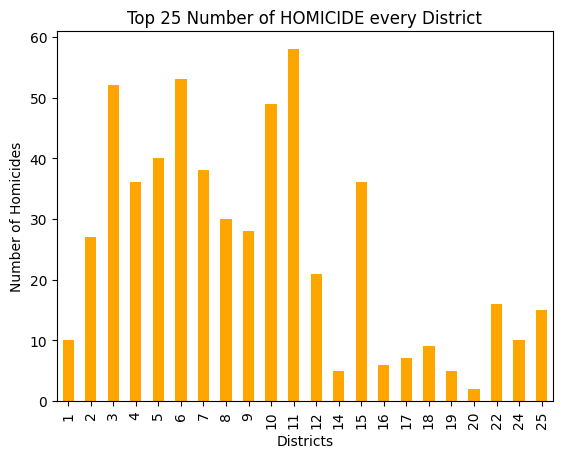

In [17]:
df_homicide.groupby(['District']).size().plot(
    kind='bar',
    color='orange'
)

plt.title("Top 25 Number of HOMICIDE every District")
plt.xlabel("Districts")
plt.ylabel("Number of Homicides")
plt.show()


# Insight 3: What can you say and observe to the bar graph above?
## Based on the data shown, the bar graph presents 25 districts with homicide cases. The number of cases appears to increase among the first few districts and then gradually decreases toward the last districts, showing a varying but observable trend across the areas.

In [7]:
Chicago_crimes['Date'] = pd.to_datetime(Chicago_crimes['Date'], errors='coerce')
Chicago_crimes['Year'] = Chicago_crimes['Date'].dt.year
Chicago_crimes['Month'] = Chicago_crimes['Date'].dt.month
Chicago_crimes['Day'] = Chicago_crimes['Date'].dt.day
Chicago_crimes['Hour'] = Chicago_crimes['Date'].dt.hour
Chicago_crimes['Weekday'] = Chicago_crimes['Date'].dt.day_name()

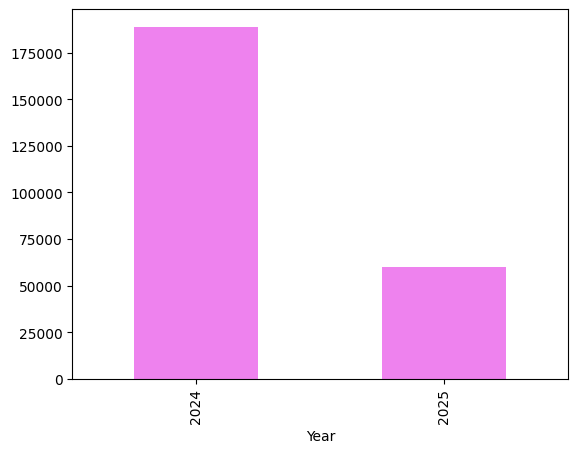

In [26]:
Chicago_crimes['Year'].value_counts().plot(kind='bar', 
                                           color='Violet'
                                    
)
plt.show()

# Insigh 4: What year recorded the higher number of crimes?
## The bar graph shows two years, 2024 and 2025, with 2024 having more reported crimes, indicating an increase for the next year.

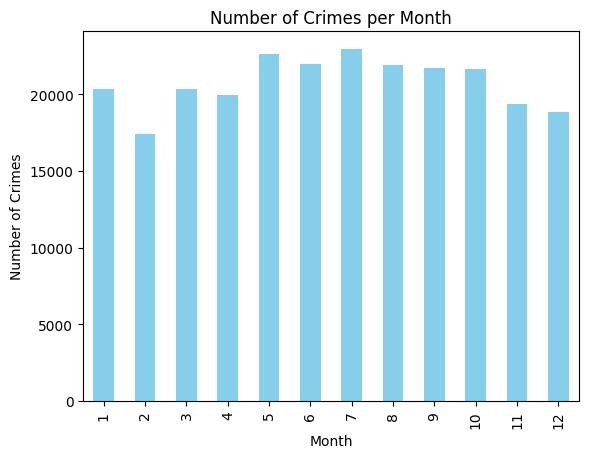

In [30]:
Chicago_crimes['Month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

# Insights 5: In which month were the highest and lowest numbers of crimes recorded?
## The month of July recorded the highest number of crimes, while February had the lowest.

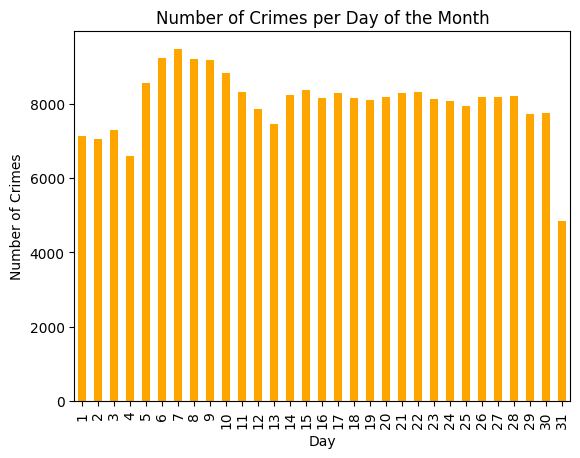

In [31]:
Chicago_crimes['Day'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Number of Crimes per Day of the Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.show()

# Insight 6: Which top 5 days of the month record the most crime incidents?
## Based on the data, the 7th day has the highest number of crime incidents, followed by the 6th, 8th, 9th, and 10th days. This shows that crimes mostly happen around these days, especially in the first half of the month. It might mean that people are more active or certain events happen during this time that lead to more reported crimes.

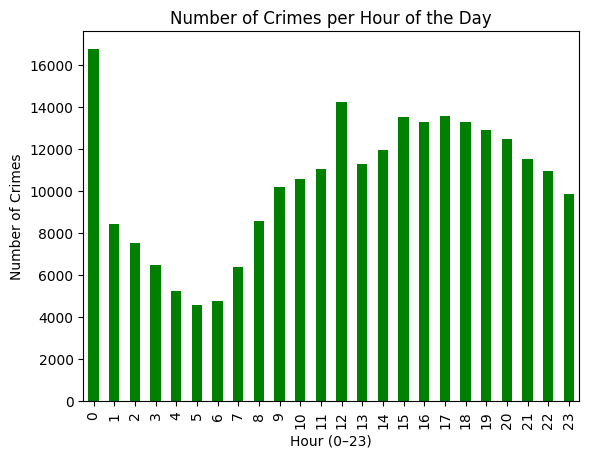

In [32]:
Chicago_crimes['Hour'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Number of Crimes per Hour of the Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Number of Crimes')
plt.show()

# Insight 7: At what time of day do crimes usually happen, morning, afternoon, or evening?
## Crimes happen more in the early morning, go up again around noon and the afternoon, and then go down at night. This means people are more likely to commit or report crimes when others are active during the day.

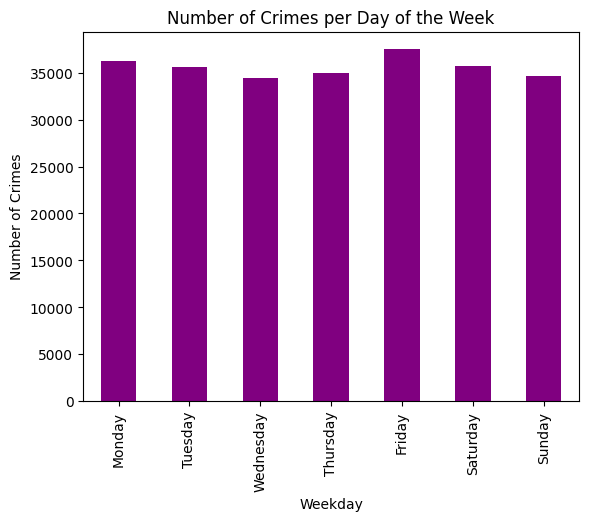

In [34]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Chicago_crimes['Weekday'].value_counts().reindex(order).plot(kind='bar', color='purple')
plt.title('Number of Crimes per Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Crimes')
plt.show()


# Insight 8: Which day of the week usually has the most crimes?
## The bar graph has shown that accident per week usually happens on Friday.

In [38]:
df_loc = Chicago_crimes[Chicago_crimes['Location Description'].isin(['SIDEWALK ', 'STREET'])]
df_loc

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour,Weekday
2,13428676,JH224478,2024-04-14,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)",4,14,0,Sunday
3,13429357,JH225293,2024-04-14,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)",4,14,0,Sunday
11,13428561,JH224385,2024-04-14,008XX N SACRAMENTO BLVD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1905265.0,2024,12/21/2024 03:40:46 PM,41.895837,-87.702211,"(41.895837291, -87.702210849)",4,14,0,Sunday
18,13428850,JH224732,2024-04-14,017XX E 86TH PL,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,1847970.0,2024,12/21/2024 03:40:46 PM,41.737879,-87.581669,"(41.737878596, -87.581668867)",4,14,0,Sunday
21,13428693,JH224570,2024-04-14,025XX W MARQUETTE RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1860148.0,2024,12/21/2024 03:40:46 PM,41.771935,-87.686234,"(41.771935215, -87.686233751)",4,14,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249111,13803230,JJ215010,2025-12-04,0000X E 89TH PL,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,1845678.0,2025,04/19/2025 03:41:24 PM,41.731840,-87.621116,"(41.731839921, -87.621115939)",12,4,0,Thursday
249112,13805724,JJ218238,2025-12-04,017XX N WELLS ST,0810,THEFT,OVER $500,STREET,False,False,...,1912149.0,2025,04/19/2025 03:41:24 PM,41.914338,-87.634808,"(41.914338356, -87.634808141)",12,4,0,Thursday
249119,13804023,JJ215813,2025-12-04,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)",12,4,0,Thursday
249121,13803475,JJ215338,2025-12-04,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)",12,4,0,Thursday


In [41]:
df_rest = df_loc[df_loc['Arrest'] == True].groupby('Location Description').size()
df_rest

Location Description
STREET    10625
dtype: int64

# VISUALIZATION

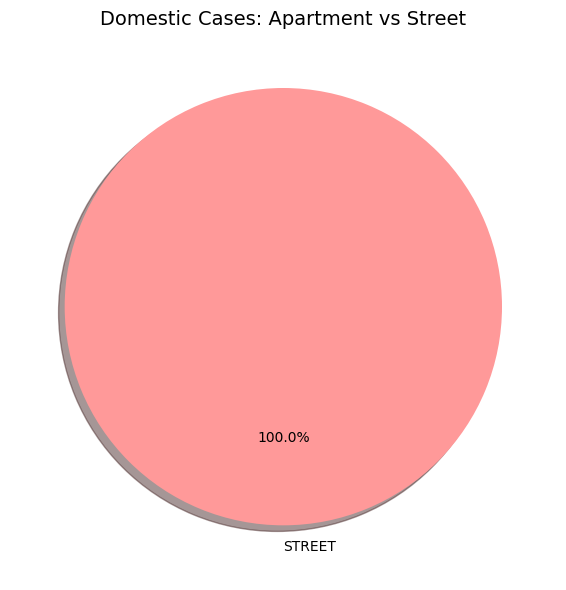

In [42]:

plt.figure(figsize=(6,6))
df_rest.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#FF9999','#66B2FF'],
    startangle=90,
    shadow=True
)

plt.title('Domestic Cases: Apartment vs Street', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


# Insight 9: Where do most cases in this category occur, on the street or in apartments?
## all cases occur on the street, showing that crimes in this category happen only in public areas.

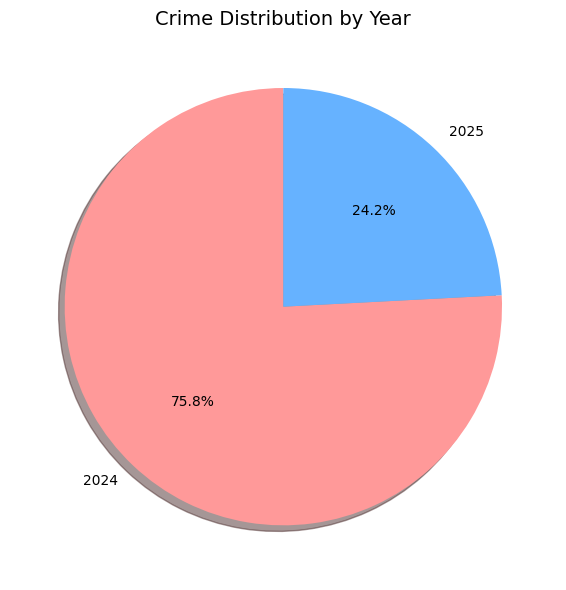

In [43]:
year_counts = Chicago_crimes['Year'].value_counts()
plt.figure(figsize=(6,6))
year_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#FF9999','#66B2FF'],
    startangle=90,
    shadow=True
)
plt.title('Crime Distribution by Year', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

# Insights 10: Which year has the most reported crimes?
## Most crimes were reported in 2024, showing an increase compared to 2025.

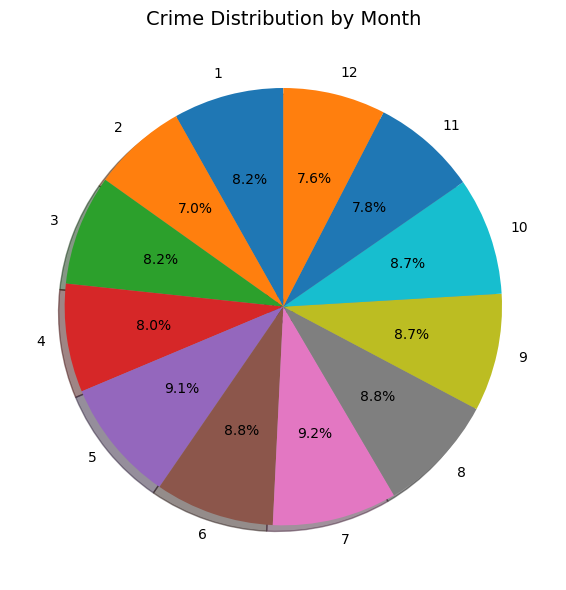

In [44]:
month_counts = Chicago_crimes['Month'].value_counts().sort_index()
plt.figure(figsize=(6,6))
month_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.title('Crime Distribution by Month', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


# Insight 11:  Which month records the most crimes?
## Some months have higher crime rates than others, showing that crimes vary throughout the year. However, the highest recorded is on July.

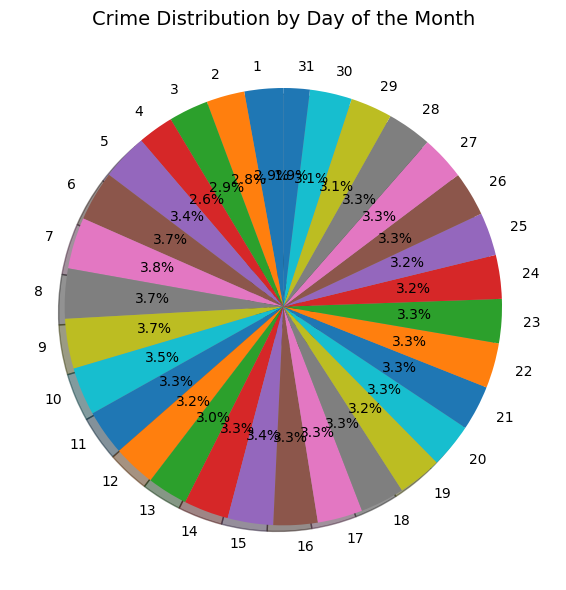

In [45]:
day_counts = Chicago_crimes['Day'].value_counts().sort_index()
plt.figure(figsize=(6,6))
day_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.title('Crime Distribution by Day of the Month', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


# Isight 12: Which days of the month have the less crimes?
## Crimes happen more often on certain days, especially in the last day of the month(31th).

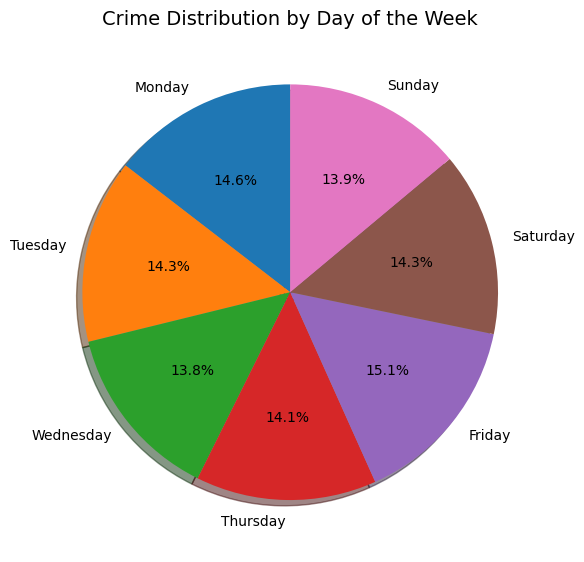

In [46]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_counts = Chicago_crimes['Weekday'].value_counts().reindex(order)
plt.figure(figsize=(6,6))
weekday_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.title('Crime Distribution by Day of the Week', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


# Insight 13: What are the top 2 of the day where crimes mostyly happned?
## Crimes are more frequent on certain days, often higher during weekdays which are the Friday and Monday. .

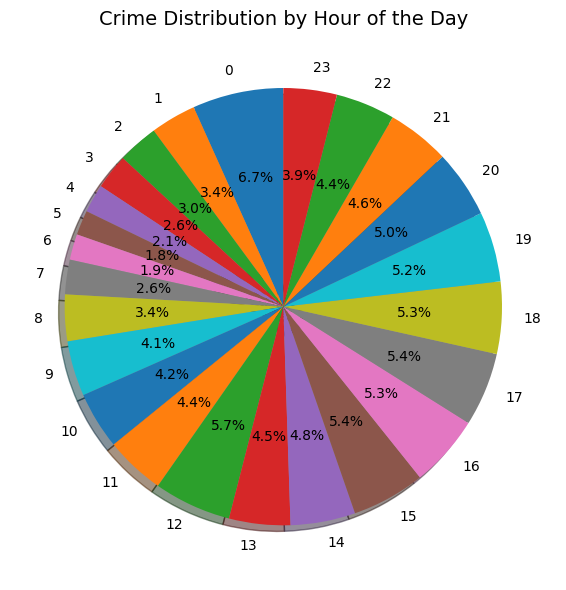

In [48]:
hour_counts = Chicago_crimes['Hour'].value_counts().sort_index()
plt.figure(figsize=(6,6))
hour_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.title('Crime Distribution by Hour of the Day', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


# insight 14: During which part of the day are crimes morerately reported?
## Modeartely,it is on afternoon that suggesting that criminal activity tends to peak when people are starting afternoon.

In [53]:
THEFT_df = Chicago_crimes[Chicago_crimes['Primary Type'] == 'THEFT']
BATTERY_df = Chicago_crimes[Chicago_crimes['Primary Type'] == 'BATTERY']
ASSAULT_df = Chicago_crimes[Chicago_crimes['Primary Type'] == 'ASSAULT']
DECEPTIVE_df = Chicago_crimes[Chicago_crimes['Primary Type'] == 'DECEPTIVE PRACTICE']
MOTOR_THEFT_df = Chicago_crimes[Chicago_crimes['Primary Type'] == 'MOTOR VEHICLE THEFT']
STALKING_df = Chicago_crimes[Chicago_crimes['Primary Type'] == 'STALKING']

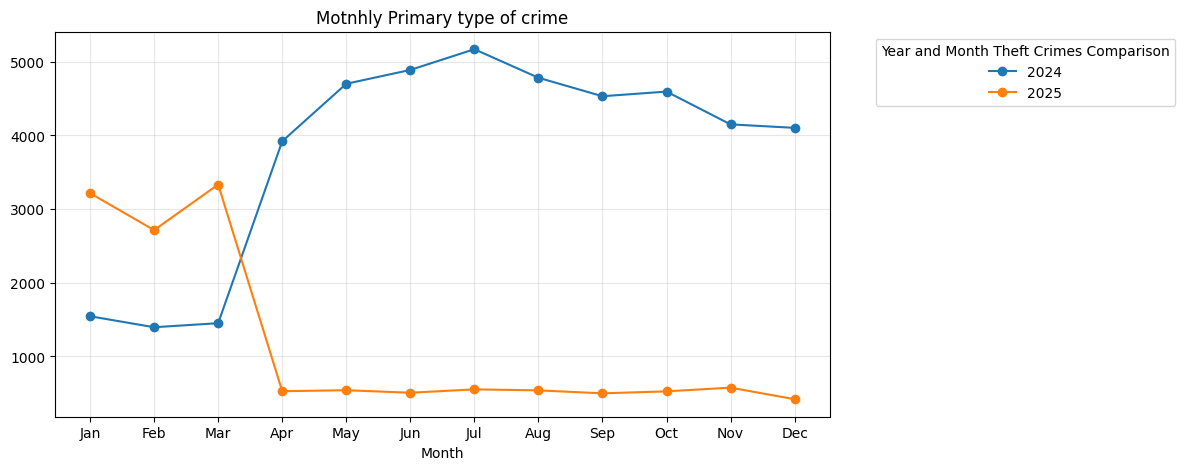

In [69]:
THEFT_data = THEFT_df.groupby(['Year', 'Month']).size()
THEFT_data = THEFT_data.unstack(level=0)
THEFT_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Motnhly Primary type of crime'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Theft Crimes Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Insight 15: Which year had more theft cases, 2024 or 2025? Starting on what month?
## 2024 had more theft cases staring from April to December than 2025. This shows that thefts went down a little in 2025 compared to the previous year.

# Insight 16: Do theft cases change during different months of the year?
## In the year 2024, from January to March and May to December, it slightly changes. However, in the month of April, it greatly increases. In 2025, it is the same but opposite, with April showing a great decrease.

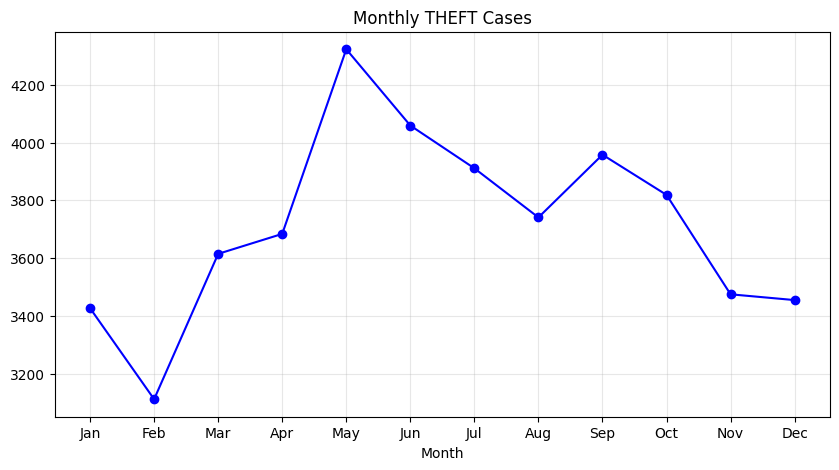

In [88]:
plt.figure(figsize=(10,5))
BATTERY_df.groupby(['Momth']).size().plot(marker='o', color='blue', title='Monthly THEFT Cases')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()


# Insight 17: How do THEFT cases change throughout the year?
## THEFT cases drop in some months and rise in others, showing that thefts follow certain patterns across the year. All in all, the number of thefts always change dramatically month-to-month(decreasing and inreasing).

# Insight 18: Are there months when THEFT incidents stay relatively steady?
## Most of the months, the number of THEFT crimes doesn't stay relatively. This indicates that periods where theft activity is not stable.

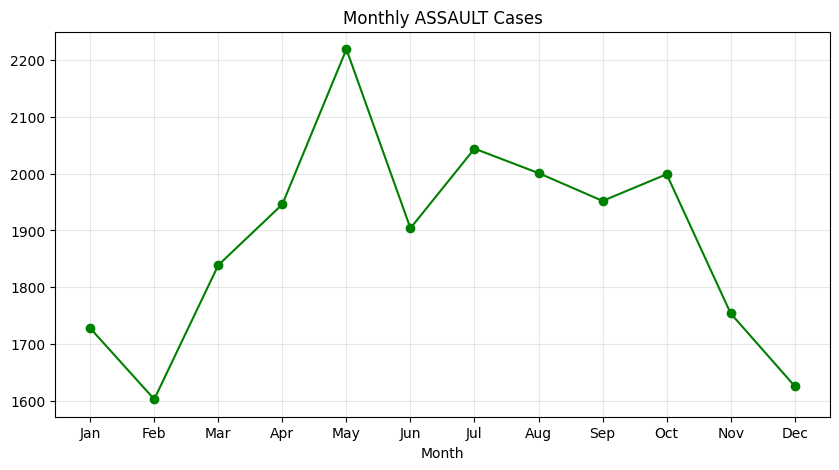

In [91]:
plt.figure(figsize=(10,5))
ASSAULT_df.groupby(['Month']).size().plot(marker='o', color='green', title='Monthly ASSAULT Cases')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

# Insight 19: Does the number of ASSAULT cases show a clear pattern over the months?
## ASSAULT cases do not stay consistent; some months have more incidents while others have fewer.

# Insight 20: Are there consecutive months with similar numbers of ASSAULT incidents?
## No, because the number of ASSAULT crimes changes month to month.

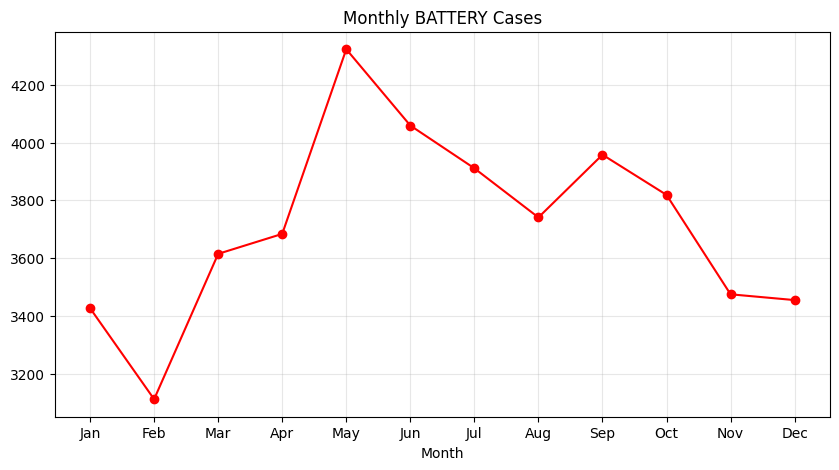

In [95]:
plt.figure(figsize=(10,5))
BATTERY_df.groupby(['Month']).size().plot(marker='o', color='red', title='Monthly BATTERY Cases')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

# Insight 21: How do BATTERY cases of crimes change from the start to the middle of the year?
## BATTERY incidents start lower, and drop in the middle of the month, and then fall again at the end, showing that violent incidents can shift over the year.

# Insight 22: Are there months when BATTERY cases suddenly rise or fall?
## Yes. The rising numbers of the BATTERY cases started from the month of February to May. While the drop cases happened on October to December.

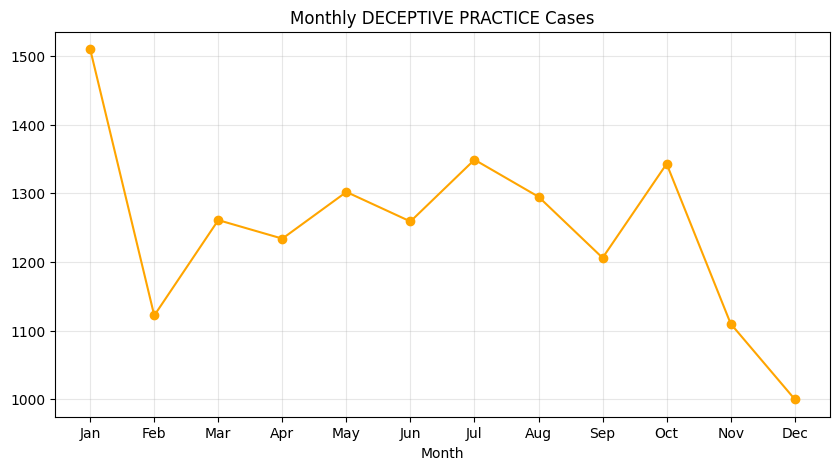

In [96]:
plt.figure(figsize=(10,5))
DECEPTIVE_df.groupby(['Month']).size().plot(marker='o', color='orange', title='Monthly DECEPTIVE PRACTICE Cases')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

# Insight 23: Are DECEPTIVE PRACTICE cases higher in some months than others?
## DECEPTIVE PRACTICE cases was higner from the starting of the year, January.

# Insight 24: Are there months where the number of DECEPTIVE PRACTICE cases stays almost the same as the previous month?
## there's no such months with the same numbers of DECEPTIVE PRATICE cases because it always decreasing and increasing, showing not consistency.

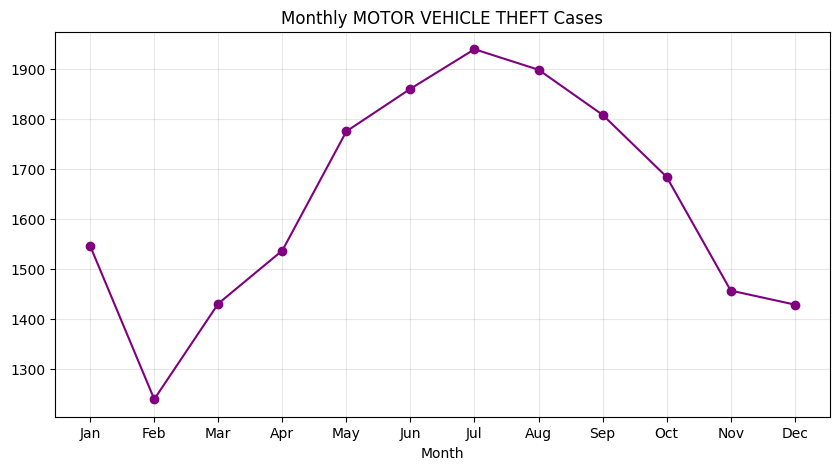

In [93]:
plt.figure(figsize=(10,5))
MOTOR_THEFT_df.groupby(['Month']).size().plot(marker='o', color='purple', title='Monthly MOTOR VEHICLE THEFT Cases')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

# Insight 25: Does MOTOR VEHICLE THEFT show a steady increase or decrease over the months?
## Vehicle thefts rise and fall throughout the year, showing no steady increase or decrease.

# Insight 26: Are there any noticeable jumps or drops in MOTOR VEHICLE THEFT incidents?
## Some months have sudden jumps or drops, suggesting seasonal or event-related factors affecting theft, so yes it is very obvious.

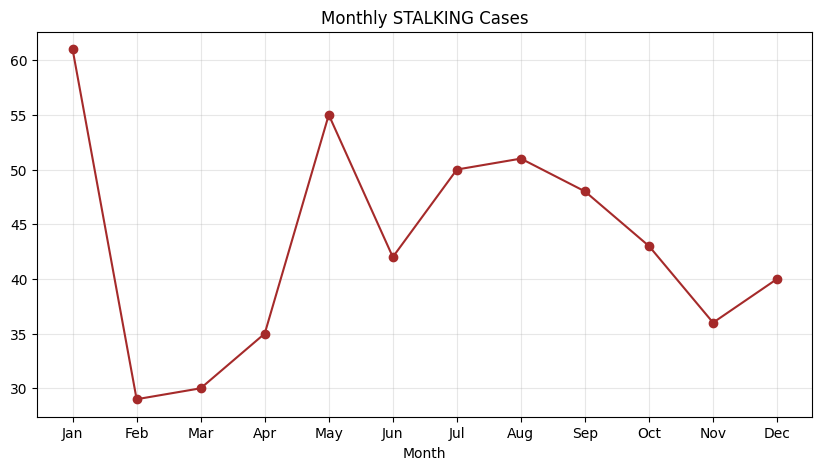

In [94]:
plt.figure(figsize=(10,5))
STALKING_df.groupby(['Month']).size().plot(marker='o', color='brown', title='Monthly STALKING Cases')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

# Insight 27: Does the number of STALKING cases rise gradually or suddenly in some months?
## STALKING cases was drop at first, then little by little it arises until it drop again at the end of the year.

# Insight 28: Are there months when STALKING cases remain stable compared to others?
## Just like other datas, it always dropping and arising. So there's no stable numbers has been recorded.


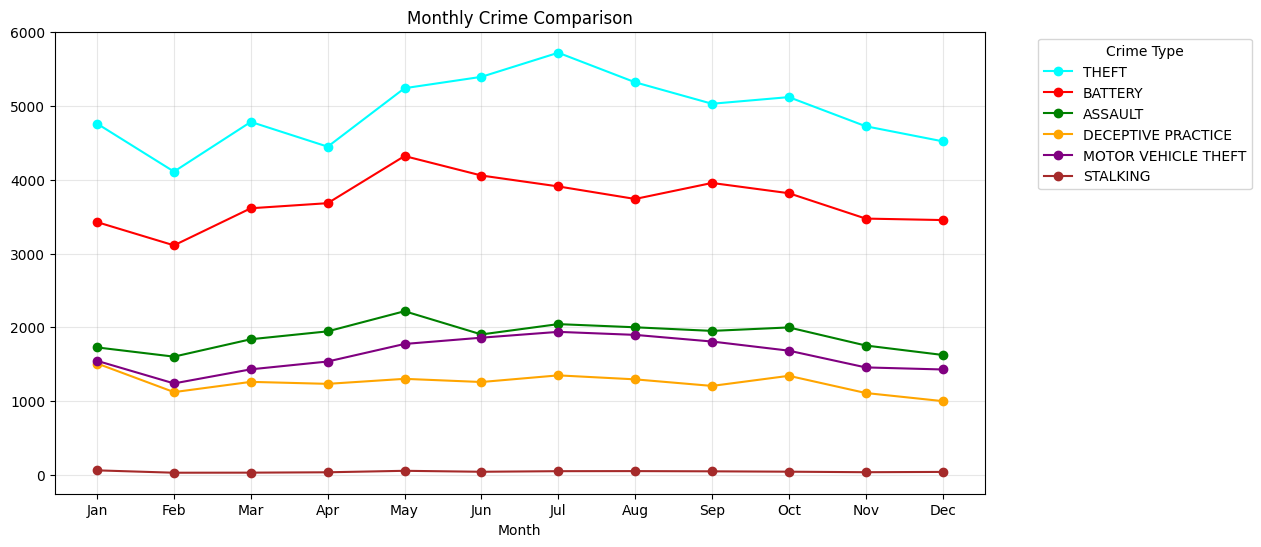

In [97]:
plt.figure(figsize=(12,6))

THEFT_df.groupby(['Month']).size().plot(marker='o', label='THEFT', color='cyan')
BATTERY_df.groupby(['Month']).size().plot(marker='o', label='BATTERY', color='red')
ASSAULT_df.groupby(['Month']).size().plot(marker='o', label='ASSAULT', color='green')
DECEPTIVE_df.groupby(['Month']).size().plot(marker='o', label='DECEPTIVE PRACTICE', color='orange')
MOTOR_THEFT_df.groupby(['Month']).size().plot(marker='o', label='MOTOR VEHICLE THEFT', color='purple')
STALKING_df.groupby(['Month']).size().plot(marker='o', label='STALKING', color='brown')

plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Crime Comparison')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Insight 29: Which crime type has the highest cases overall in the year?
## THEFT seems to have the highest number of cases compared to the other crimes, indicating it is the most common type.

# Insight 30: Which crime type has the lowest cases overall?
## STALKING shows the lowest number of cases throughout the year, suggesting it is less frequent than other crimes.

# Insight 31: Are there months when multiple crimes peak at the same time?
## There is no months from all the type of crimes has been occured. All crimes have different numbers per month.

# Insight 32: Do crime cases stay steady or fluctuate month-to-month?
## Most crime cases does not stay frequently. However, when we compare all the crimes based on the graph, its like STALKING crime is stable because comparing them together shows a large numbers of data.

# Insight 33: How does BATTERY compare to ASSAULT throughout the year?
## BATTERY and ASSAULT cases have similar patterns, rising and falling around the same months, suggesting related factors. But its not the same in numbers, BATTERY crime cases has a big number of data.

# Insight 34: Are there months when some crimes suddenly increase?
## Most of the crime cases suddenly increases between February to May.

# Insight 35: Are there months with generally low crime for all types?
## Among all the crimes, only STALKING has very low of numbers recorded throught the whole year.
